<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Drought_Prediction-using-Satellite-data-with-AI/blob/main/Drought_Indice_generation_LANDSAT(13_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdal
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.listdir()
#new

['.config', 'drive', 'sample_data']

# **Calculating LST:**

In [ ]:
os.chdir("/content/drive/MyDrive/Drought_Dataset/LST")
os.listdir()

['LC08_L2SP_145049_20130420_20200913_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20130522_20200912_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20131216_20200912_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20140117_20200912_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20131114_20200912_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20140202_20200912_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20140218_20200911_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20140322_20200911_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20140407_20200911_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20140423_20200911_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20140626_20200911_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20141203_20200910_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20150120_20200910_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20150205_20200910_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20150221_20200909_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20150325_20200909_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20150410_20200909_02_T1_ST_B10.TIF',
 'LC08_L2SP_145049_20150426_20200909_02_T1_ST_B1

In [ ]:
path = "/content/drive/MyDrive/Drought_Dataset/LST"
file_names=os.listdir(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#splitted the data into train and test set
train_files= (file_names[0:100])
test_files= (file_names[100:112])

In [ ]:

LST_img_data_train=list()
for file in train_files:
    ds=gdal.Open(os.path.join(path, file))
    data= ds.ReadAsArray(xoff=3000,yoff=1000, xsize=512, ysize=512)   #cropped the bigger image and got 256*256 image from the mentioned x & y offset location
    LST_img_data_train.append(data)

In [ ]:

LST_img_data_test=list()
for file in test_files:
    ds=gdal.Open(os.path.join(path, file))
    data= ds.ReadAsArray(xoff=3000,yoff=1000, xsize=512, ysize=512)   #cropped the bigger image and got 256*256 image from the mentioned x & y offset location
    LST_img_data_test.append(data)

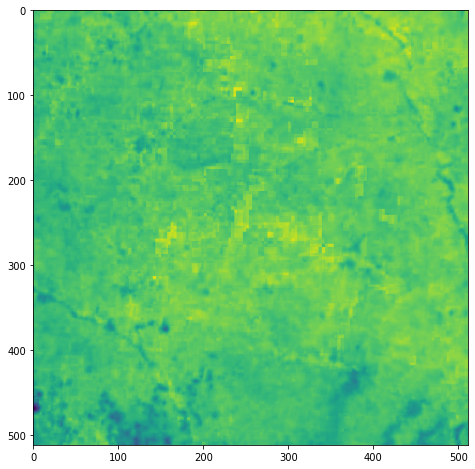

In [ ]:
LST_img_data_train[1]
fig= plt.figure(figsize=(8,8))
plt.imshow(LST_img_data_train[1])

In [ ]:
LST_img_data_train[1]

array([[51808, 51691, 51612, ..., 52326, 52448, 52535],
       [51784, 51658, 51575, ..., 52419, 52541, 52625],
       [51747, 51641, 51572, ..., 52368, 52478, 52555],
       ...,
       [50436, 50490, 50561, ..., 51425, 51335, 51230],
       [50405, 50463, 50544, ..., 51471, 51404, 51316],
       [50393, 50454, 50541, ..., 51429, 51373, 51295]], dtype=uint16)

**Rescaling the pixel values of LANDSAT-8 to get the surface temperature values in kelvin:**
 
                   Surface temperature = Pixel value*0.00341802 + 149.0 

In [ ]:
#Scaling the LST values to represent pixel values in kelvin
LST_train = list()
for img in LST_img_data_train:
  img = (img*0.00341802) + 149.0
  LST_train.append(img)

In [ ]:
LST_train[1]

array([[326.08078016, 325.68087182, 325.41084824, ..., 327.85131452,
        328.26831296, 328.5656807 ],
       [325.99874768, 325.56807716, 325.2843815 , ..., 328.16919038,
        328.58618882, 328.8733025 ],
       [325.87228094, 325.50997082, 325.27412744, ..., 327.99487136,
        328.37085356, 328.6340411 ],
       ...,
       [321.39125672, 321.5758298 , 321.81850922, ..., 324.7716785 ,
        324.4640567 , 324.1051646 ],
       [321.2852981 , 321.48354326, 321.76040288, ..., 324.92890742,
        324.69990008, 324.39911432],
       [321.24428186, 321.45278108, 321.75014882, ..., 324.78535058,
        324.59394146, 324.3273359 ]])

In [ ]:
#Scaling the LST values to represent pixel values in kelvin
LST_test = list()
for img in LST_img_data_test:
  img = (img*0.00341802) + 149.0
  LST_test.append(img)

In [ ]:
print(LST_test[1])
print(LST_train[1])

[[302.39048354 304.73866328 307.06291688 ... 307.39446482 307.0663349
  306.90226994]
 [300.55158878 302.51695028 304.7249912  ... 307.82513534 307.56536582
  307.3739567 ]
 [299.38262594 301.18392248 303.12193982 ... 308.52241142 308.34467438
  308.16693734]
 ...
 [316.07965364 315.27641894 314.84916644 ... 318.03476108 317.63827076
  316.8589622 ]
 [315.3208532  314.61674108 314.20657868 ... 318.02792504 317.77499156
  317.10505964]
 [314.5176185  313.97415332 313.70754776 ... 317.90829434 317.89120424
  317.48445986]]
[[326.08078016 325.68087182 325.41084824 ... 327.85131452 328.26831296
  328.5656807 ]
 [325.99874768 325.56807716 325.2843815  ... 328.16919038 328.58618882
  328.8733025 ]
 [325.87228094 325.50997082 325.27412744 ... 327.99487136 328.37085356
  328.6340411 ]
 ...
 [321.39125672 321.5758298  321.81850922 ... 324.7716785  324.4640567
  324.1051646 ]
 [321.2852981  321.48354326 321.76040288 ... 324.92890742 324.69990008
  324.39911432]
 [321.24428186 321.45278108 321.75

In [ ]:
# saving the LST values
lst_train_file = open("/content/drive/MyDrive/Drought_Dataset/Indices and data/LST_train.txt","w")
for array in LST_train:
  np.savetxt(lst_train_file,array)
lst_train_file.close()

lst_test_file = open("/content/drive/MyDrive/Drought_Dataset/Indices and data/LST_test.txt","w")
for array in LST_test:
  np.savetxt(lst_test_file,array)
lst_test_file.close()

In [ ]:
orig = np.loadtxt("/content/drive/MyDrive/Drought_Dataset/Indices and data/LST_test.txt")
orig= orig.reshape(12,512,512)
orig[1].shape

(512, 512)

# **Calculating NDVI:**

In [ ]:
path_band4 = "/content/drive/MyDrive/Drought_Dataset/Band4"
path_band5 = "/content/drive/MyDrive/Drought_Dataset/Band5"
file_names_band4=os.listdir(path_band4)
file_names_band5 = os.listdir(path_band5)

In [ ]:
img_data_ndvi_band4=list()
for file in file_names_band4:
    ds=gdal.Open(os.path.join(path_band4, file))
    data= ds.ReadAsArray(xoff=3000,yoff=1000, xsize=512, ysize=512)   #cropped the bigger image and got 256*256 image from the mentioned x & y offset location
    #data = (data*	0.0000275 + (-0.2))
    img_data_ndvi_band4.append(data)

In [ ]:
img_data_ndvi_band4[1]

array([[12178, 11861, 11823, ..., 11379, 11175, 11070],
       [12166, 11835, 11490, ..., 11706, 11184, 11153],
       [11710, 11540, 11424, ..., 11988, 11319, 11354],
       ...,
       [11217, 11505, 11541, ..., 12018, 11495, 11592],
       [11234, 11454, 11399, ..., 11893, 11561, 11593],
       [11236, 11647, 11608, ..., 11860, 11499, 11468]], dtype=uint16)

In [ ]:
img_data_ndvi_band5=list()
for file in file_names_band5:
    ds=gdal.Open(os.path.join(path_band5, file))
    data= ds.ReadAsArray(xoff=3000,yoff=1000, xsize=512, ysize=512)   #cropped the bigger image and got 256*256 image from the mentioned x & y offset location
    #data = (data*	0.0000275 + (-0.2))
    img_data_ndvi_band5.append(data)

In [ ]:
img_data_ndvi_band5[1]

array([[14272, 13955, 13757, ..., 13691, 13041, 12821],
       [14386, 13773, 13174, ..., 13971, 12990, 12982],
       [13739, 13251, 13095, ..., 14191, 13117, 13220],
       ...,
       [13063, 13626, 13593, ..., 14472, 13690, 13753],
       [13227, 13564, 13444, ..., 14118, 13655, 13733],
       [13539, 13986, 13675, ..., 14066, 13557, 13525]], dtype=uint16)

In [ ]:
NDVI= list()
for i in range(0,(len(file_names_band5))):
    band4= img_data_ndvi_band4[i]
    band5= img_data_ndvi_band5[i]
    #converting into float data type
    red= band4.astype('float32')
    nir= band5.astype('float32')
    
    #computation of ndvi
    #ndvi= np.where((nir+red)==0.,0,(nir-red)/(nir+red))
    ndvi = ((nir-red)/(nir + red))
    #print(ndvi)
    NDVI.append(ndvi)

In [ ]:
len(NDVI)

112

In [ ]:
for i in NDVI:
  print(i.min())

0.01892362
0.02218468
0.0097736195
-0.03148452
-0.12213845
0.005652599
0.031844914
-0.05569276
0.009852869
0.034179356
0.0018549674
-0.15845302
-0.0683639
-0.14846839
-0.13106945
-0.10315599
-0.06411451
-0.03459536
-0.083176516
-0.120603256
-0.11851924
-0.034371987
-0.06500274
-0.098178424
-0.042398985
-0.030329252
0.022089915
0.012286485
0.027332032
-0.09422398
-0.007620164
0.024103519
-0.14958997
-0.1516679
-0.05766526
-0.07467057
-0.014312552
-0.16893657
-0.014572532
-0.103153825
0.025730096
0.0035184908
0.0032209244
-0.031566594
0.022246737
-0.009431123
-0.02405842
-0.0054900814
-0.0012397482
0.0013600508
-0.00037643517
-0.013470437
-0.017317414
-0.08206469
-0.08333645
-0.07219
-0.033422064
-0.0041900147
0.035918955
-0.009953767
0.0003566152
-0.008846078
-0.012326735
0.03321193
-0.037152033
-0.02609363
0.0061034374
0.00907258
0.008033532
0.0011737089
-0.0062560155
-9.779951e-05
-0.018050198
0.0028623012
0.02941048
0.02093226
0.015176279
0.027056277
0.028895061
-0.06749292
-0.087830

In [ ]:
for i in range(len(NDVI)):
  if NDVI[i].min() < (-1):
    print(i)

In [ ]:
for i in range(len(NDVI)):
  if NDVI[i].max() > (1):
    print(i)

In [ ]:
NDVI_train = NDVI[0:100]
NDVI_test = NDVI[100:112]
len(NDVI_test),len(NDVI_train)
    

(12, 100)

In [ ]:
#saving NDVI data as txt file
ndvi_train_file = open("/content/drive/MyDrive/Drought_Dataset/Indices and data/NDVI_train.txt","w")
for array in NDVI_train:
  np.savetxt(ndvi_train_file,array)
ndvi_train_file.close()

ndvi_test_file = open("/content/drive/MyDrive/Drought_Dataset/Indices and data/NDVI_test.txt","w")
for array in NDVI_test:
  np.savetxt(ndvi_test_file,array)
ndvi_test_file.close()

In [ ]:
# reading from saved txt file
NDVI_train = np.loadtxt("/content/drive/MyDrive/Drought_Dataset/Indices and data/NDVI_train.txt").reshape(100,512,512)
NDVI_test = np.loadtxt("/content/drive/MyDrive/Drought_Dataset/Indices and data/NDVI_test.txt").reshape(12,512,512)

In [ ]:
np.max(NDVI_train), np.min(NDVI_train), np.max(NDVI_test), np.min(NDVI_test)

(0.7874215841293335, -0.1902969777584076, 1.0, -0.47208741307258606)

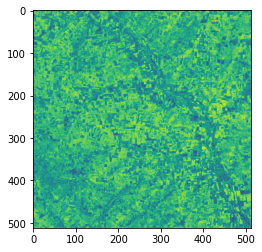

In [ ]:
plt.imshow(NDVI_train[3])

## **VCI (Vegetation Condition Index Calculation)**

> Formula : **VCI** = 100 * ([NDVI - NDVImin]/[NDVImax - NDVImin])


In [ ]:
# for train data
VCI_train = []
NDVI_max_train = np.max(NDVI_train)
NDVI_min_train = np.min(NDVI_train)
for i in NDVI_train:
  vci = np.divide(([i - NDVI_min_train]),([NDVI_max_train - NDVI_min_train]))*100
  VCI_train.append(vci)

In [ ]:
VCI_train[2].shape

(1, 500, 500)

In [ ]:
# for test data
VCI_test = []
NDVI_max_test = np.max(NDVI_test)
NDVI_min_test = np.min(NDVI_test)
for i in NDVI_test:
  vci = np.divide(([i - NDVI_min_test]),([NDVI_max_test - NDVI_min_test]))*100
  VCI_test.append(vci)

In [ ]:
v = vci.reshape(512,512)
v.shape

(512, 512)

In [ ]:
np.min(VCI_test)

0.0

In [ ]:
#save the vci values in txt file
# saving the LST values
vci_train_file = open("/content/drive/MyDrive/Drought_Dataset/Indices and data/VCI_train.txt","w")
for array in VCI_train:
  array = array.reshape(512,512)
  np.savetxt(vci_train_file,array)
vci_train_file.close()

In [ ]:
vci_test_file = open("/content/drive/MyDrive/Drought_Dataset/Indices and data/VCI_test.txt","w")
for array in VCI_test:
  array = array.reshape(512,512)
  np.savetxt(vci_test_file,array)
vci_test_file.close()

In [ ]:
vci_train = np.loadtxt("/content/drive/MyDrive/Drought_Dataset/Indices and data/VCI_train.txt")
vci_train = vci_train.reshape(100,512,512)
vci_train[1]

array([[27.56061237, 27.75946754, 27.19626403, ..., 28.895714  ,
        27.34462432, 26.95951427],
       [28.01486131, 27.20378458, 26.446734  , ..., 28.48551996,
        27.10446063, 27.21427707],
       [27.61787186, 26.52235249, 26.43380375, ..., 28.07028581,
        26.98904931, 27.22980815],
       ...,
       [27.23960033, 28.09548105, 27.81366593, ..., 28.93835913,
        28.37749431, 28.18401455],
       [27.79671212, 28.08949982, 27.8826585 , ..., 28.21238368,
        27.95686799, 28.10574875],
       [28.97087146, 28.79627651, 27.82513535, ..., 28.16611201,
        27.86415243, 27.88123654]])

In [ ]:
vci_test = np.loadtxt("/content/drive/MyDrive/Drought_Dataset/Indices and data/VCI_test.txt").reshape(12,512,512)
np.min(vci_test)

0.0

# **TCI Calculation**

Temperature Condition index is calculated as:
> **TCI** = 100*([BTmax - BT]/[BTmax - BTmin])



In [ ]:
LST_train = np.loadtxt("/content/drive/MyDrive/Drought_Dataset/Indices and data/LST_train.txt").reshape(100,512,512)
LST_test = np.loadtxt("/content/drive/MyDrive/Drought_Dataset/Indices and data/LST_test.txt").reshape(12,512,512)

In [ ]:
np.min(LST_test)

246.03758779999998

In [ ]:
TCI_train = []
LST_max = np.max(LST_train)
LST_min = np.min(LST_train)
for lst in LST_train:
  tci = np.divide((LST_max- lst),(LST_max- LST_min))*100
  TCI_train.append(tci)

In [ ]:
TCI_test = []
LST_max = np.max(LST_test)
LST_min = np.min(LST_test)
for lst in LST_test:
  tci = np.divide((LST_max- lst),(LST_max- LST_min))*100
  TCI_test.append(tci)

In [ ]:
np.max(TCI_test)

100.0

In [ ]:
# save TCI values in txt file
tci_train_file = open("/content/drive/MyDrive/Drought_Dataset/Indices and data/TCI_train.txt","w")
for array in TCI_train:
  np.savetxt(tci_train_file,array)
tci_train_file.close()


In [ ]:
tci_test_file = open("/content/drive/MyDrive/Drought_Dataset/Indices and data/TCI_test.txt","w")
for array in TCI_test:
  np.savetxt(tci_test_file,array)
tci_test_file.close()

In [ ]:
TCI_train[1]

array([[12.17586989, 12.37533457, 12.51001585, ..., 11.29276983,
        11.08478102, 10.93646112],
       [12.21678572, 12.43159384, 12.57309443, ..., 11.13422098,
        10.92623216, 10.78302675],
       [12.2798643 , 12.46057589, 12.57820891, ..., 11.22116712,
        11.03363622, 10.90236459],
       ...,
       [14.51489166, 14.42283103, 14.30178836, ..., 12.82881838,
        12.98225276, 13.16125953],
       [14.56774128, 14.46886135, 14.33077041, ..., 12.75039637,
        12.86461974, 13.01464446],
       [14.58819919, 14.48420478, 14.33588489, ..., 12.82199908,
        12.91746936, 13.05044581]])

# **Vegetation Health Index (VHI)**


> Calculated as: **VHI** = a* VCI +(1-a)*TCI

where a is a coeffecient determining the contribution of both the indices

In [ ]:
VCI_train = np.loadtxt('/content/drive/MyDrive/Drought_Dataset/Indices and data/VCI_train.txt').reshape(100,512,512)
VCI_test = np.loadtxt('/content/drive/MyDrive/Drought_Dataset/Indices and data/VCI_test.txt').reshape(12,512,512)
TCI_train = np.loadtxt('/content/drive/MyDrive/Drought_Dataset/Indices and data/TCI_train.txt').reshape(100,512,512)
TCI_test = np.loadtxt('/content/drive/MyDrive/Drought_Dataset/Indices and data/TCI_test.txt').reshape(12,512,512)


In [ ]:
np.max(TCI_train)

100.0

In [ ]:
# keeping a=0.5
VHI_train = []
for i in range(100):
  vhi = 0.5*VCI_train[i] + 0.5*TCI_train[i]
  VHI_train.append(vhi)


In [ ]:
VHI_train[1]

array([[19.86824113, 20.06740106, 19.85313994, ..., 20.09424192,
        19.21470267, 18.94798769],
       [20.11582352, 19.81768921, 19.50991422, ..., 19.80987047,
        19.0153464 , 18.99865191],
       [19.94886808, 19.49146419, 19.50600633, ..., 19.64572647,
        19.01134277, 19.06608637],
       ...,
       [20.87724599, 21.25915604, 21.05772714, ..., 20.88358876,
        20.67987353, 20.67263704],
       [21.1822267 , 21.27918058, 21.10671446, ..., 20.48139003,
        20.41074386, 20.5601966 ],
       [21.77953532, 21.64024065, 21.08051012, ..., 20.49405554,
        20.39081089, 20.46584118]])

In [ ]:
# keeping a=0.5
VHI_test = []
for i in range(12):
  vhi = 0.5*VCI_test[i] + 0.5*TCI_test[i]
  VHI_test.append(vhi)

In [ ]:
VHI_test[1]

array([[37.99250681, 39.57891971, 36.09329066, ..., 33.01101915,
        33.07236498, 33.96455351],
       [39.72941386, 44.94261709, 44.80217217, ..., 35.33743546,
        36.56570644, 37.48867204],
       [43.33147088, 47.0702937 , 47.72914482, ..., 40.13124248,
        42.0671773 , 43.68116291],
       ...,
       [38.19631051, 38.08237313, 37.64348595, ..., 24.15611245,
        30.07502541, 35.7663906 ],
       [38.81642198, 39.38665981, 40.29040374, ..., 23.12813993,
        24.57348752, 29.09230515],
       [39.58508607, 40.63737211, 41.26610995, ..., 21.86008199,
        24.0650766 , 24.74188941]])

In [ ]:
np.max(VHI_test)

78.9297391878393

In [ ]:
#saving VHI values as txt file
vhi_train_file = open("/content/drive/MyDrive/Drought_Dataset/Indices and data/VHI_train.txt","w")
for array in VHI_train:
  array = array.reshape(512,512)
  np.savetxt(vhi_train_file,array)
vhi_train_file.close()

In [ ]:
vhi_test_file = open("/content/drive/MyDrive/Drought_Dataset/Indices and data/VHI_test.txt","w")
for array in VHI_test:
  array = array.reshape(512,512)
  np.savetxt(vhi_test_file,array)
vhi_test_file.close()

In [ ]:
VHI_Tr = np.loadtxt("/content/drive/MyDrive/Drought_Dataset/Indices and data/VHI_train.txt").reshape(100,512,512)
VHI_te = np.loadtxt("/content/drive/MyDrive/Drought_Dataset/Indices and data/VHI_test.txt").reshape(12,512,512)

In [ ]:
VHI_Tr[1]

array([[19.86824113, 20.06740106, 19.85313994, ..., 20.09424192,
        19.21470267, 18.94798769],
       [20.11582352, 19.81768921, 19.50991422, ..., 19.80987047,
        19.0153464 , 18.99865191],
       [19.94886808, 19.49146419, 19.50600633, ..., 19.64572647,
        19.01134277, 19.06608637],
       ...,
       [20.87724599, 21.25915604, 21.05772714, ..., 20.88358876,
        20.67987353, 20.67263704],
       [21.1822267 , 21.27918058, 21.10671446, ..., 20.48139003,
        20.41074386, 20.5601966 ],
       [21.77953532, 21.64024065, 21.08051012, ..., 20.49405554,
        20.39081089, 20.46584118]])

In [ ]:
np.min(VHI_te)

11.045629435410364